In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Načtení dat
digits = datasets.load_digits()
y = digits.target
data = digits.images

# Převedení dat na jednorozměrné pole
n_samples = len(data)
data = data.reshape([n_samples, -1])

# Rozdělení dat na trénovací a testovací sady
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

# Vytvoření a natrénování modelu
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predikce na testovacích datech
y_pred = clf.predict(X_test)

# Výpočet accuracy a matice záměn
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 0.9796296296296296
Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  1  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  0  1  0  0  1  1 56]]


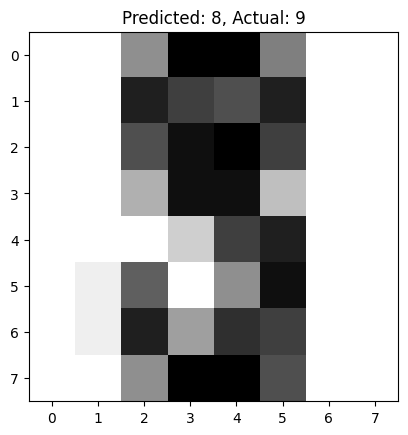

In [8]:
# Bonus - zobrazení špatně predikovaných obrázků
for i in range(0, len(y_pred)):
    # Podmínka, která porovná predikovanou hodnotu pro i-tý obrázek a skutečnou hodnotu pro i-tý obrázek
    if y_pred[i] != y_test[i]:
        # Načtení i-tého obrázku z proměnné X_test
        image = X_test[i]
        # Obrázek převedeme zpět na matici 8x8
        image = image.reshape(8, 8)
        # Příkaz na zobrazení obrázku
        plt.imshow(image, cmap=plt.cm.gray_r)
        # Grafu dáme titulek, který porovnává predikovanou a skutečnou hodnotu
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        # Obrázek uložíme do souboru
        plt.savefig(f"{i}.png")
